In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
countries =['Series Description', 'Australia', 'Euro', 'NEWZEALAND', 'UK', 'Brazil', 'Canada', 'China', 'Denmark', 'Hong Kong', 'India', 'Japan','Korea','Malaysia','Mexico','Norway', 'Sweden','South Africa', 'Singapore', 'Sri Lanka', 'Switzerland', 'Taiwan', 'Thailand', 'Venezuela']
df=pd.read_csv('FRB_H10.csv', names = countries)

In [27]:
pd.set_option('display.max_columns', 999)
df

,Series Description,Australia,Euro,NEWZEALAND,UK,Brazil,Canada,China,Denmark,Hong Kong,India,Japan,Korea,Malaysia,Mexico,Norway,Sweden,South Africa,Singapore,Sri Lanka,Switzerland,Taiwan,Thailand,Venezuela
0,Series Description,"AUSTRALIA -- SPOT EXCHANGE RATE, US$/AUSTRALIA...",SPOT EXCHANGE RATE - EURO AREA,"NEW ZEALAND -- SPOT EXCHANGE RATE, US$/NZ$ (RE...","United Kingdom -- Spot Exchange Rate, US$/Poun...","BRAZIL -- SPOT EXCHANGE RATE, REAIS/US$","CANADA -- SPOT EXCHANGE RATE, CANADIAN $/US$","CHINA -- SPOT EXCHANGE RATE, YUAN/US$","DENMARK -- SPOT EXCHANGE RATE, KRONER/US$","HONG KONG -- SPOT EXCHANGE RATE, HK$/US$","INDIA -- SPOT EXCHANGE RATE, RUPEES/US$","JAPAN -- SPOT EXCHANGE RATE, YEA/US$","KOREA -- SPOT EXCHANGE RATE, WON/US$","Malaysia - Spot Exchange Rate, Ringgit/US$","MEXICO -- SPOT EXCHANGE RATE, PESOS/US$","NORWAY -- SPOT EXCHANGE RATE, KRONER/US$","SWEDEN -- SPOT EXCHANGE RATE, KRONOR/US$","SOUTH AFRICA -- SPOT EXCHANGE RATE, RAND/US$","Singapore - SPOT EXCHANGE RATE, SINGAPORE $/US$","SRI LANKA -- SPOT EXCHANGE RATE, RUPEES/US$","SWITZERLAND -- SPOT EXCHANGE RATE, FRANCS/US$","TAIWAN -- SPOT EXCHANGE RATE, NT$/US$",THAILAND -- SPOT EXCHANGE RATE -- THAILAND,"VENEZUELA -- SPOT EXCHANGE RATE, BOLIVARES/US$"
1,Unit:,Currency:_Per_AUD,Currency:_Per_EUR,Currency:_Per_NZD,Currency:_Per_GBP,Currency:_Per_USD,Currency:_Per_USD,Currency:_Per_USD,Currency:_Per_USD,Currency:_Per_USD,Currency:_Per_USD,Currency:_Per_USD,Currency:_Per_USD,Currency:_Per_USD,Currency:_Per_USD,Currency:_Per_USD,Currency:_Per_USD,Currency:_Per_USD,Currency:_Per_USD,Currency:_Per_USD,Currency:_Per_USD,Currency:_Per_USD,Currency:_Per_USD,Currency:_Per_USD
2,Multiplier:,1,1,1,0.00999999978,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,Currency:,USD,USD,USD,USD,BRL,CAD,CNY,DKK,HKD,INR,JPY,KRW,MYR,MXN,NOK,SEK,ZAR,SGD,LKR,CHF,TWD,THB,VEB
4,Unique Identifier:,H10/H10/RXI$US_N.M.AL,H10/H10/RXI$US_N.M.EU,H10/H10/RXI$US_N.M.NZ,H10/H10/RXI$US_N.M.UK,H10/H10/RXI_N.M.BZ,H10/H10/RXI_N.M.CA,H10/H10/RXI_N.M.CH,H10/H10/RXI_N.M.DN,H10/H10/RXI_N.M.HK,H10/H10/RXI_N.M.IN,H10/H10/RXI_N.M.JA,H10/H10/RXI_N.M.KO,H10/H10/RXI_N.M.MA,H10/H10/RXI_N.M.MX,H10/H10/RXI_N.M.NO,H10/H10/RXI_N.M.SD,H10/H10/RXI_N.M.SF,H10/H10/RXI_N.M.SI,H10/H10/RXI_N.M.SL,H10/H10/RXI_N.M.SZ,H10/H10/RXI_N.M.TA,H10/H10/RXI_N.M.TH,H10/H10/RXI_N.M.VE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,2020-01,0.6851,1.1098,0.6601,1.3076,4.1512,1.3089,6.9184,6.7339,7.7725,71.2790,109.2667,1167.4624,4.0785,18.8066,8.9615,9.5099,14.4136,1.3517,181.3219,0.9698,30.0200,30.4700,66616.9705
247,2020-02,0.6664,1.0911,0.6390,1.2953,4.3470,1.3286,6.9967,6.8469,7.7757,71.5295,110.0295,1195.3358,4.1625,18.8423,9.2957,9.6881,15.0244,1.3897,181.5016,0.9762,30.1574,31.3226,73360.9811
248,2020-03,0.6218,1.1046,0.6056,1.2369,4.8862,1.3960,7.0205,6.7646,7.7651,74.5482,107.6673,1218.1945,4.2958,22.3785,10.2403,9.8437,16.6761,1.4171,184.4095,0.9593,30.1305,32.0945,73313.7127
249,2020-04,0.6312,1.0871,0.6015,1.2420,5.3171,1.4048,7.0708,6.8638,7.7512,76.1682,107.7386,1223.1309,4.3493,24.1798,10.4199,10.0164,18.5651,1.4228,191.3536,0.9701,30.0732,32.6127,121810.0041


In [28]:
df.head(10)

,Series Description,Australia,Euro,NEWZEALAND,UK,Brazil,Canada,China,Denmark,Hong Kong,India,Japan,Korea,Malaysia,Mexico,Norway,Sweden,South Africa,Singapore,Sri Lanka,Switzerland,Taiwan,Thailand,Venezuela
0,Series Description,"AUSTRALIA -- SPOT EXCHANGE RATE, US$/AUSTRALIA...",SPOT EXCHANGE RATE - EURO AREA,"NEW ZEALAND -- SPOT EXCHANGE RATE, US$/NZ$ (RE...","United Kingdom -- Spot Exchange Rate, US$/Poun...","BRAZIL -- SPOT EXCHANGE RATE, REAIS/US$","CANADA -- SPOT EXCHANGE RATE, CANADIAN $/US$","CHINA -- SPOT EXCHANGE RATE, YUAN/US$","DENMARK -- SPOT EXCHANGE RATE, KRONER/US$","HONG KONG -- SPOT EXCHANGE RATE, HK$/US$","INDIA -- SPOT EXCHANGE RATE, RUPEES/US$","JAPAN -- SPOT EXCHANGE RATE, YEA/US$","KOREA -- SPOT EXCHANGE RATE, WON/US$","Malaysia - Spot Exchange Rate, Ringgit/US$","MEXICO -- SPOT EXCHANGE RATE, PESOS/US$","NORWAY -- SPOT EXCHANGE RATE, KRONER/US$","SWEDEN -- SPOT EXCHANGE RATE, KRONOR/US$","SOUTH AFRICA -- SPOT EXCHANGE RATE, RAND/US$","Singapore - SPOT EXCHANGE RATE, SINGAPORE $/US$","SRI LANKA -- SPOT EXCHANGE RATE, RUPEES/US$","SWITZERLAND -- SPOT EXCHANGE RATE, FRANCS/US$","TAIWAN -- SPOT EXCHANGE RATE, NT$/US$",THAILAND -- SPOT EXCHANGE RATE -- THAILAND,"VENEZUELA -- SPOT EXCHANGE RATE, BOLIVARES/US$"
1,Unit:,Currency:_Per_AUD,Currency:_Per_EUR,Currency:_Per_NZD,Currency:_Per_GBP,Currency:_Per_USD,Currency:_Per_USD,Currency:_Per_USD,Currency:_Per_USD,Currency:_Per_USD,Currency:_Per_USD,Currency:_Per_USD,Currency:_Per_USD,Currency:_Per_USD,Currency:_Per_USD,Currency:_Per_USD,Currency:_Per_USD,Currency:_Per_USD,Currency:_Per_USD,Currency:_Per_USD,Currency:_Per_USD,Currency:_Per_USD,Currency:_Per_USD,Currency:_Per_USD
2,Multiplier:,1,1,1,0.00999999978,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,Currency:,USD,USD,USD,USD,BRL,CAD,CNY,DKK,HKD,INR,JPY,KRW,MYR,MXN,NOK,SEK,ZAR,SGD,LKR,CHF,TWD,THB,VEB
4,Unique Identifier:,H10/H10/RXI$US_N.M.AL,H10/H10/RXI$US_N.M.EU,H10/H10/RXI$US_N.M.NZ,H10/H10/RXI$US_N.M.UK,H10/H10/RXI_N.M.BZ,H10/H10/RXI_N.M.CA,H10/H10/RXI_N.M.CH,H10/H10/RXI_N.M.DN,H10/H10/RXI_N.M.HK,H10/H10/RXI_N.M.IN,H10/H10/RXI_N.M.JA,H10/H10/RXI_N.M.KO,H10/H10/RXI_N.M.MA,H10/H10/RXI_N.M.MX,H10/H10/RXI_N.M.NO,H10/H10/RXI_N.M.SD,H10/H10/RXI_N.M.SF,H10/H10/RXI_N.M.SI,H10/H10/RXI_N.M.SL,H10/H10/RXI_N.M.SZ,H10/H10/RXI_N.M.TA,H10/H10/RXI_N.M.TH,H10/H10/RXI_N.M.VE
5,Time Period,RXI$US_N.M.AL,RXI$US_N.M.EU,RXI$US_N.M.NZ,RXI$US_N.M.UK,RXI_N.M.BZ,RXI_N.M.CA,RXI_N.M.CH,RXI_N.M.DN,RXI_N.M.HK,RXI_N.M.IN,RXI_N.M.JA,RXI_N.M.KO,RXI_N.M.MA,RXI_N.M.MX,RXI_N.M.NO,RXI_N.M.SD,RXI_N.M.SF,RXI_N.M.SI,RXI_N.M.SL,RXI_N.M.SZ,RXI_N.M.TA,RXI_N.M.TH,RXI_N.M.VE
6,2000-01,0.6560,1.0131,0.5127,1.6404,1.8057,1.4486,8.2792,7.3492,7.7791,43.5895,105.2960,1130.9900,3.8000,9.4935,8.0241,8.4918,6.1309,1.6757,73.1400,1.5903,30.8895,37.3800,0.6528
7,2000-02,0.6278,0.9834,0.4903,1.6000,1.7765,1.4512,8.2781,7.5725,7.7816,43.6540,109.3885,1129.7455,3.8000,9.4265,8.2374,8.6480,6.3209,1.7028,73.5520,1.6348,30.8058,37.7585,0.6594
8,2000-03,0.6094,0.9643,0.4902,1.5799,1.7424,1.4608,8.2786,7.7228,7.7848,43.6383,106.3074,1116.3904,3.8000,9.2886,8.4100,8.6971,6.4675,1.7153,73.8096,1.6636,30.7198,37.9226,0.6668
9,2000-04,0.5960,0.9449,0.4960,1.5823,1.7696,1.4689,8.2793,7.8872,7.7880,43.6847,105.6270,1110.3200,3.8000,9.3937,8.6272,8.7486,6.6480,1.7096,74.1225,1.6657,30.5203,37.9928,0.6727


In [29]:
df[0:6]

,Series Description,Australia,Euro,NEWZEALAND,UK,Brazil,Canada,China,Denmark,Hong Kong,India,Japan,Korea,Malaysia,Mexico,Norway,Sweden,South Africa,Singapore,Sri Lanka,Switzerland,Taiwan,Thailand,Venezuela
0,Series Description,"AUSTRALIA -- SPOT EXCHANGE RATE, US$/AUSTRALIA...",SPOT EXCHANGE RATE - EURO AREA,"NEW ZEALAND -- SPOT EXCHANGE RATE, US$/NZ$ (RE...","United Kingdom -- Spot Exchange Rate, US$/Poun...","BRAZIL -- SPOT EXCHANGE RATE, REAIS/US$","CANADA -- SPOT EXCHANGE RATE, CANADIAN $/US$","CHINA -- SPOT EXCHANGE RATE, YUAN/US$","DENMARK -- SPOT EXCHANGE RATE, KRONER/US$","HONG KONG -- SPOT EXCHANGE RATE, HK$/US$","INDIA -- SPOT EXCHANGE RATE, RUPEES/US$","JAPAN -- SPOT EXCHANGE RATE, YEA/US$","KOREA -- SPOT EXCHANGE RATE, WON/US$","Malaysia - Spot Exchange Rate, Ringgit/US$","MEXICO -- SPOT EXCHANGE RATE, PESOS/US$","NORWAY -- SPOT EXCHANGE RATE, KRONER/US$","SWEDEN -- SPOT EXCHANGE RATE, KRONOR/US$","SOUTH AFRICA -- SPOT EXCHANGE RATE, RAND/US$","Singapore - SPOT EXCHANGE RATE, SINGAPORE $/US$","SRI LANKA -- SPOT EXCHANGE RATE, RUPEES/US$","SWITZERLAND -- SPOT EXCHANGE RATE, FRANCS/US$","TAIWAN -- SPOT EXCHANGE RATE, NT$/US$",THAILAND -- SPOT EXCHANGE RATE -- THAILAND,"VENEZUELA -- SPOT EXCHANGE RATE, BOLIVARES/US$"
1,Unit:,Currency:_Per_AUD,Currency:_Per_EUR,Currency:_Per_NZD,Currency:_Per_GBP,Currency:_Per_USD,Currency:_Per_USD,Currency:_Per_USD,Currency:_Per_USD,Currency:_Per_USD,Currency:_Per_USD,Currency:_Per_USD,Currency:_Per_USD,Currency:_Per_USD,Currency:_Per_USD,Currency:_Per_USD,Currency:_Per_USD,Currency:_Per_USD,Currency:_Per_USD,Currency:_Per_USD,Currency:_Per_USD,Currency:_Per_USD,Currency:_Per_USD,Currency:_Per_USD
2,Multiplier:,1,1,1,0.00999999978,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,Currency:,USD,USD,USD,USD,BRL,CAD,CNY,DKK,HKD,INR,JPY,KRW,MYR,MXN,NOK,SEK,ZAR,SGD,LKR,CHF,TWD,THB,VEB
4,Unique Identifier:,H10/H10/RXI$US_N.M.AL,H10/H10/RXI$US_N.M.EU,H10/H10/RXI$US_N.M.NZ,H10/H10/RXI$US_N.M.UK,H10/H10/RXI_N.M.BZ,H10/H10/RXI_N.M.CA,H10/H10/RXI_N.M.CH,H10/H10/RXI_N.M.DN,H10/H10/RXI_N.M.HK,H10/H10/RXI_N.M.IN,H10/H10/RXI_N.M.JA,H10/H10/RXI_N.M.KO,H10/H10/RXI_N.M.MA,H10/H10/RXI_N.M.MX,H10/H10/RXI_N.M.NO,H10/H10/RXI_N.M.SD,H10/H10/RXI_N.M.SF,H10/H10/RXI_N.M.SI,H10/H10/RXI_N.M.SL,H10/H10/RXI_N.M.SZ,H10/H10/RXI_N.M.TA,H10/H10/RXI_N.M.TH,H10/H10/RXI_N.M.VE
5,Time Period,RXI$US_N.M.AL,RXI$US_N.M.EU,RXI$US_N.M.NZ,RXI$US_N.M.UK,RXI_N.M.BZ,RXI_N.M.CA,RXI_N.M.CH,RXI_N.M.DN,RXI_N.M.HK,RXI_N.M.IN,RXI_N.M.JA,RXI_N.M.KO,RXI_N.M.MA,RXI_N.M.MX,RXI_N.M.NO,RXI_N.M.SD,RXI_N.M.SF,RXI_N.M.SI,RXI_N.M.SL,RXI_N.M.SZ,RXI_N.M.TA,RXI_N.M.TH,RXI_N.M.VE


In [30]:
df=df.drop([0,1,2,3,4,5])


In [31]:
df.head()

,Series Description,Australia,Euro,NEWZEALAND,UK,Brazil,Canada,China,Denmark,Hong Kong,India,Japan,Korea,Malaysia,Mexico,Norway,Sweden,South Africa,Singapore,Sri Lanka,Switzerland,Taiwan,Thailand,Venezuela
6,2000-01,0.6560,1.0131,0.5127,1.6404,1.8057,1.4486,8.2792,7.3492,7.7791,43.5895,105.2960,1130.9900,3.8000,9.4935,8.0241,8.4918,6.1309,1.6757,73.1400,1.5903,30.8895,37.3800,0.6528
7,2000-02,0.6278,0.9834,0.4903,1.6000,1.7765,1.4512,8.2781,7.5725,7.7816,43.6540,109.3885,1129.7455,3.8000,9.4265,8.2374,8.6480,6.3209,1.7028,73.5520,1.6348,30.8058,37.7585,0.6594
8,2000-03,0.6094,0.9643,0.4902,1.5799,1.7424,1.4608,8.2786,7.7228,7.7848,43.6383,106.3074,1116.3904,3.8000,9.2886,8.4100,8.6971,6.4675,1.7153,73.8096,1.6636,30.7198,37.9226,0.6668
9,2000-04,0.5960,0.9449,0.4960,1.5823,1.7696,1.4689,8.2793,7.8872,7.7880,43.6847,105.6270,1110.3200,3.8000,9.3937,8.6272,8.7486,6.6480,1.7096,74.1225,1.6657,30.5203,37.9928,0.6727
10,2000-05,0.5784,0.9059,0.4708,1.5090,1.8278,1.4957,8.2781,8.2329,7.7907,44.0759,108.3205,1119.4864,3.8000,9.5059,9.0533,9.0925,7.0238,1.7286,74.8668,1.7190,30.7718,38.9514,0.6800


In [32]:
df.tail()

,Series Description,Australia,Euro,NEWZEALAND,UK,Brazil,Canada,China,Denmark,Hong Kong,India,Japan,Korea,Malaysia,Mexico,Norway,Sweden,South Africa,Singapore,Sri Lanka,Switzerland,Taiwan,Thailand,Venezuela
246,2020-01,0.6851,1.1098,0.6601,1.3076,4.1512,1.3089,6.9184,6.7339,7.7725,71.2790,109.2667,1167.4624,4.0785,18.8066,8.9615,9.5099,14.4136,1.3517,181.3219,0.9698,30.0200,30.4700,66616.9705
247,2020-02,0.6664,1.0911,0.6390,1.2953,4.3470,1.3286,6.9967,6.8469,7.7757,71.5295,110.0295,1195.3358,4.1625,18.8423,9.2957,9.6881,15.0244,1.3897,181.5016,0.9762,30.1574,31.3226,73360.9811
248,2020-03,0.6218,1.1046,0.6056,1.2369,4.8862,1.3960,7.0205,6.7646,7.7651,74.5482,107.6673,1218.1945,4.2958,22.3785,10.2403,9.8437,16.6761,1.4171,184.4095,0.9593,30.1305,32.0945,73313.7127
249,2020-04,0.6312,1.0871,0.6015,1.2420,5.3171,1.4048,7.0708,6.8638,7.7512,76.1682,107.7386,1223.1309,4.3493,24.1798,10.4199,10.0164,18.5651,1.4228,191.3536,0.9701,30.0732,32.6127,121810.0041
250,2020-05,0.6517,1.0907,0.6087,1.2302,5.6394,1.3972,7.1016,6.8377,7.7519,75.6575,107.2000,1228.1340,4.3362,23.5240,10.0926,9.7286,18.1839,1.4178,187.5425,0.9692,29.9205,32.0805,181598.4850


In [33]:
df.describe()

,Series Description,Australia,Euro,NEWZEALAND,UK,Brazil,Canada,China,Denmark,Hong Kong,India,Japan,Korea,Malaysia,Mexico,Norway,Sweden,South Africa,Singapore,Sri Lanka,Switzerland,Taiwan,Thailand,Venezuela
count,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245
unique,245,238,243,237,241,245,239,198,245,187,245,245,245,181,244,243,245,245,237,243,237,240,245,89
top,2010-07,0.7111,1.3646,0.7153,1.5771,1.8453,1.3286,8.2765,6.7338,7.8000,48.6155,111.2390,1120.4270,3.8000,11.0319,6.3656,6.5328,6.9738,1.8295,98.9288,0.9880,29.9729,32.4418,2.1446
freq,1,3,2,2,2,1,2,9,1,6,1,1,1,64,2,2,1,1,2,2,3,2,1,54


In [40]:
type(df['Australia'][0])

str

In [34]:
df['Series Description']=pd.to_datetime(df['Series Description'], format='%Y-%m')

In [35]:
df.head()

,Series Description,Australia,Euro,NEWZEALAND,UK,Brazil,Canada,China,Denmark,Hong Kong,India,Japan,Korea,Malaysia,Mexico,Norway,Sweden,South Africa,Singapore,Sri Lanka,Switzerland,Taiwan,Thailand,Venezuela
6,2000-01-01,0.6560,1.0131,0.5127,1.6404,1.8057,1.4486,8.2792,7.3492,7.7791,43.5895,105.2960,1130.9900,3.8000,9.4935,8.0241,8.4918,6.1309,1.6757,73.1400,1.5903,30.8895,37.3800,0.6528
7,2000-02-01,0.6278,0.9834,0.4903,1.6000,1.7765,1.4512,8.2781,7.5725,7.7816,43.6540,109.3885,1129.7455,3.8000,9.4265,8.2374,8.6480,6.3209,1.7028,73.5520,1.6348,30.8058,37.7585,0.6594
8,2000-03-01,0.6094,0.9643,0.4902,1.5799,1.7424,1.4608,8.2786,7.7228,7.7848,43.6383,106.3074,1116.3904,3.8000,9.2886,8.4100,8.6971,6.4675,1.7153,73.8096,1.6636,30.7198,37.9226,0.6668
9,2000-04-01,0.5960,0.9449,0.4960,1.5823,1.7696,1.4689,8.2793,7.8872,7.7880,43.6847,105.6270,1110.3200,3.8000,9.3937,8.6272,8.7486,6.6480,1.7096,74.1225,1.6657,30.5203,37.9928,0.6727
10,2000-05-01,0.5784,0.9059,0.4708,1.5090,1.8278,1.4957,8.2781,8.2329,7.7907,44.0759,108.3205,1119.4864,3.8000,9.5059,9.0533,9.0925,7.0238,1.7286,74.8668,1.7190,30.7718,38.9514,0.6800


In [36]:
df.set_index(['Series Description'], inplace=True)

In [37]:
df.head()

,Australia,Euro,NEWZEALAND,UK,Brazil,Canada,China,Denmark,Hong Kong,India,Japan,Korea,Malaysia,Mexico,Norway,Sweden,South Africa,Singapore,Sri Lanka,Switzerland,Taiwan,Thailand,Venezuela
Series Description,,,,,,,,,,,,,,,,,,,,,,,
2000-01-01,0.6560,1.0131,0.5127,1.6404,1.8057,1.4486,8.2792,7.3492,7.7791,43.5895,105.2960,1130.9900,3.8000,9.4935,8.0241,8.4918,6.1309,1.6757,73.1400,1.5903,30.8895,37.3800,0.6528
2000-02-01,0.6278,0.9834,0.4903,1.6000,1.7765,1.4512,8.2781,7.5725,7.7816,43.6540,109.3885,1129.7455,3.8000,9.4265,8.2374,8.6480,6.3209,1.7028,73.5520,1.6348,30.8058,37.7585,0.6594
2000-03-01,0.6094,0.9643,0.4902,1.5799,1.7424,1.4608,8.2786,7.7228,7.7848,43.6383,106.3074,1116.3904,3.8000,9.2886,8.4100,8.6971,6.4675,1.7153,73.8096,1.6636,30.7198,37.9226,0.6668
2000-04-01,0.5960,0.9449,0.4960,1.5823,1.7696,1.4689,8.2793,7.8872,7.7880,43.6847,105.6270,1110.3200,3.8000,9.3937,8.6272,8.7486,6.6480,1.7096,74.1225,1.6657,30.5203,37.9928,0.6727
2000-05-01,0.5784,0.9059,0.4708,1.5090,1.8278,1.4957,8.2781,8.2329,7.7907,44.0759,108.3205,1119.4864,3.8000,9.5059,9.0533,9.0925,7.0238,1.7286,74.8668,1.7190,30.7718,38.9514,0.6800


In [49]:
for x in df.columns:
    df[x] = df[x].astype(float)

In [15]:
aust=['Australia', 'NEWZEALAND']
europe=['Euro', 'UK','Denmark', 'Norway', 'Sweden','Switzerland']
southamer=['Brazil', 'Venezuela']
northamer=['Canada', 'Mexico']
asia=['China', 'Hong Kong', 'India', 'Japan', 'Korea', 'Malaysia', 'Singapore', 'Sri Lanka', 'Taiwan', 'Thailand']
africa=['South Africa']

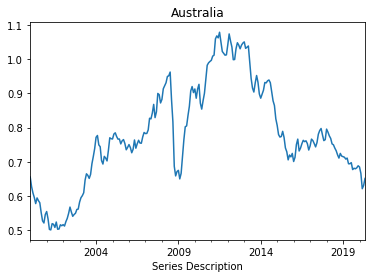

In [52]:
df['Australia'].plot(title='Australia', )

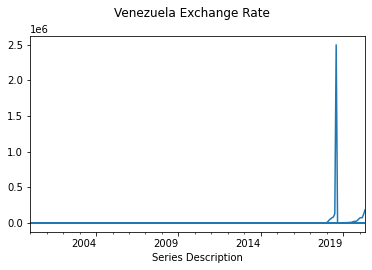

In [56]:
for x in df.columns:
    df[x].plot(title='{x} Exchange Rate'.format(x=x), subplots=True)

/Users/michaelarmistead/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/michaelarmistead/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/michaelarmistead/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNu

<function matplotlib.pyplot.show(*args, **kw)>

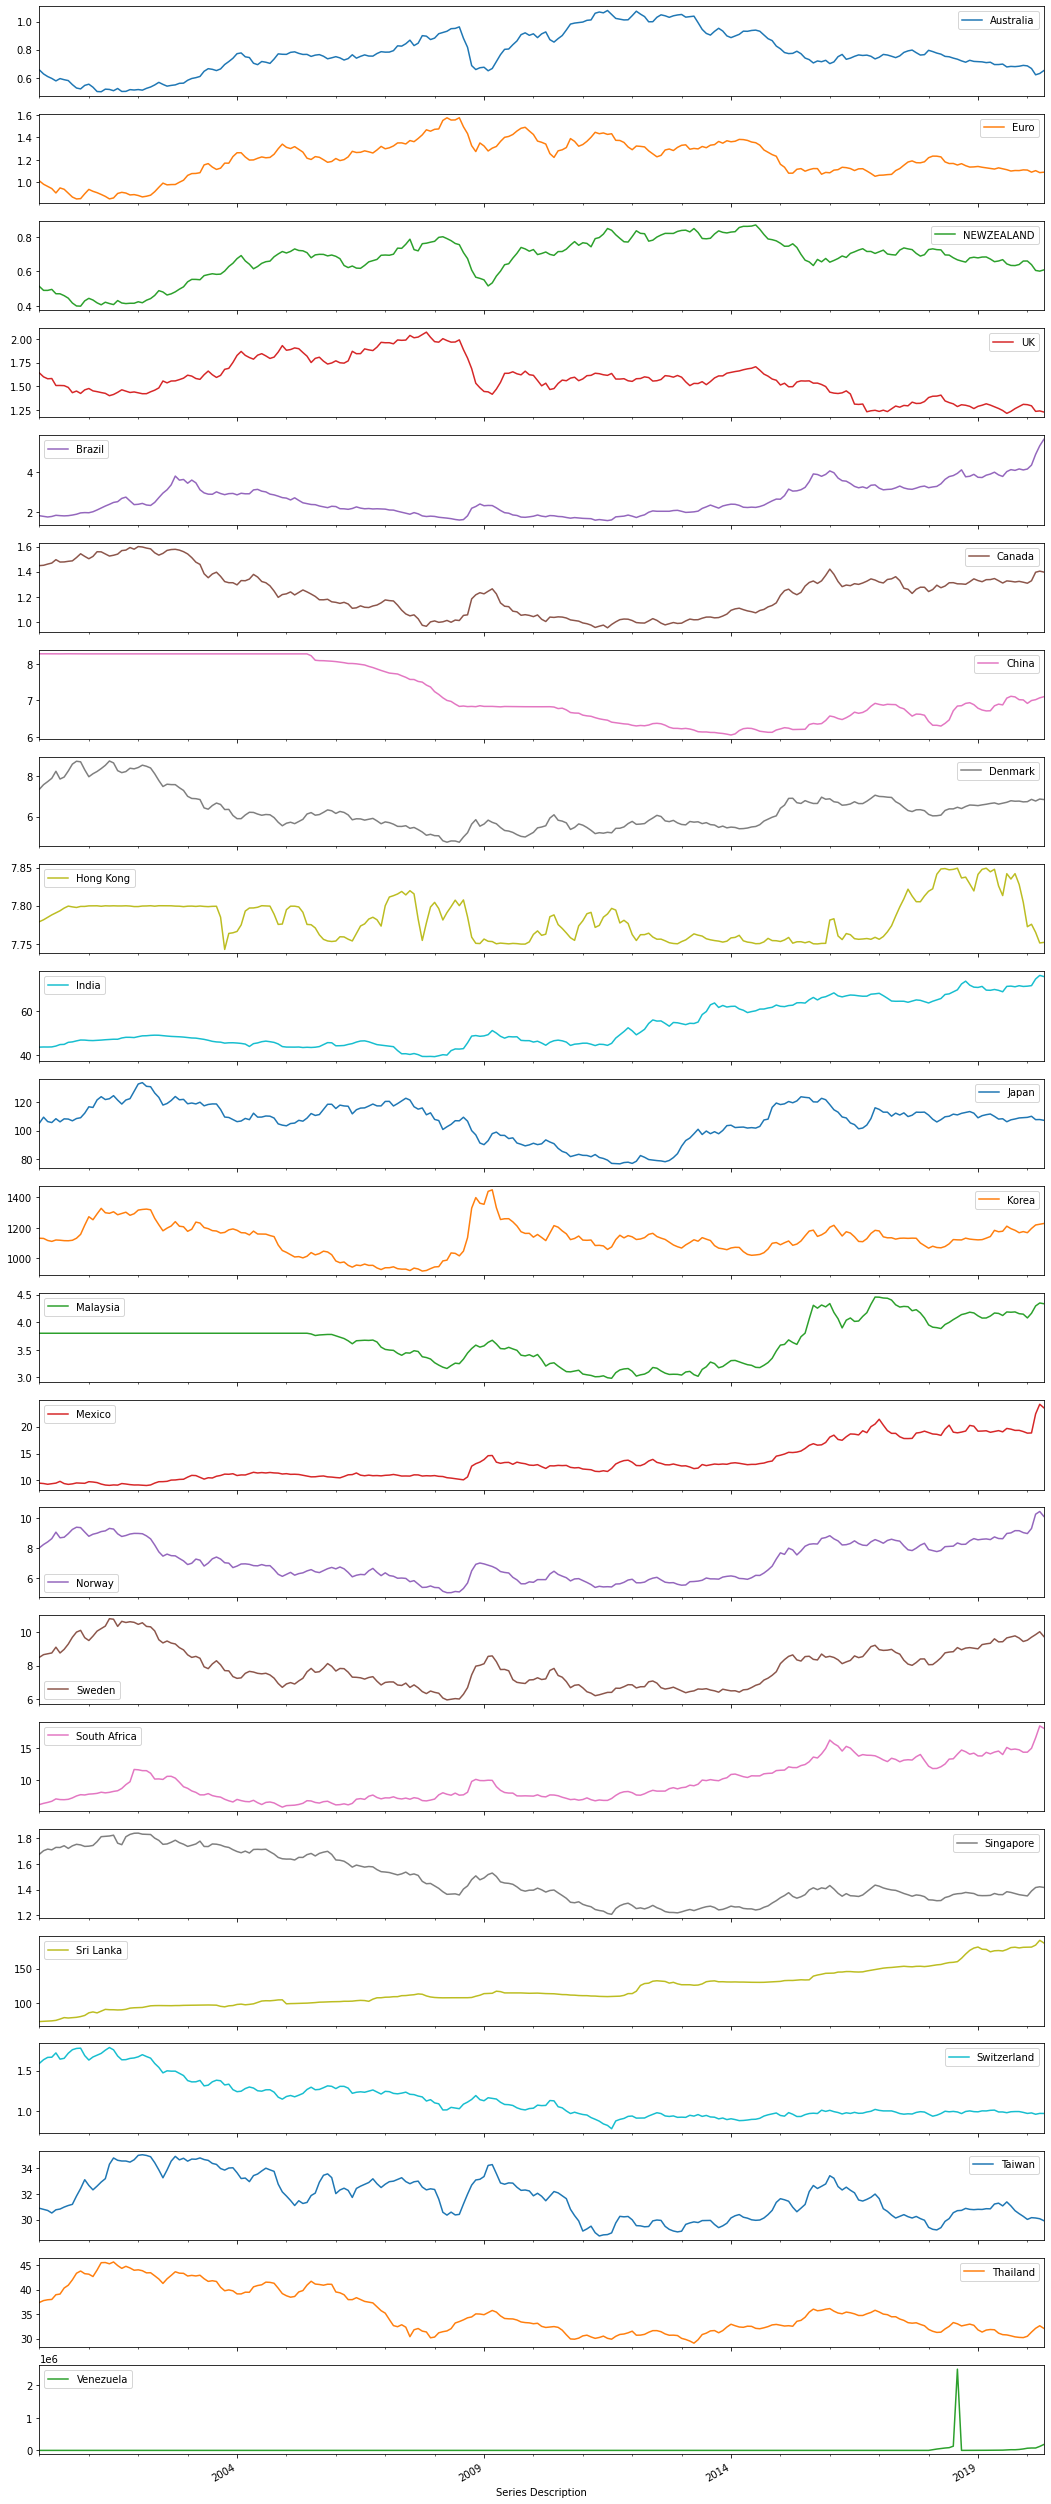

In [61]:
df.plot(subplots=True, figsize =(18,50))    
plt.show